### Install required Packages

In [ ]:
!pip install requests
!pip install matplotlib
!pip install pandas
!pip install numpy 

numpy --> Don't required this libary here, but still installing for coming labs

### Import Required packages

In [5]:
import time
import requests
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

### Get Data

In [6]:
def get_data():
    url = "http://127.0.0.1:5091/ngsi-ld/v1/entities/Node-1"
    response = requests.request("GET", url)
    return response.text

### Generate a dataframe from the data

In [7]:
def generate_dataframe():
    _data_from_warehouse = eval(get_data())
    _data_results = _data_from_warehouse["results"]
    df = pd.DataFrame.from_dict(_data_results)
    return df

In [8]:
df1=generate_dataframe()
df1.dtypes

node_id            object
Timestamp          object
Occupancy-State    object
Distance           object
dtype: object

### Convert the data in dataframe to correct format

In [9]:
def handle_datatypes():
    df = generate_dataframe()
    for i in range(1,len(df.columns)):
        df.iloc[:,i]= df.iloc[:,i].astype(float)  ##  all columns value converted to float
    return df

In [10]:
df2=handle_datatypes()
df2.dtypes

node_id             object
Timestamp          float64
Occupancy-State    float64
Distance           float64
dtype: object

### Plot the graphs

In [11]:
def plot_latest():
    df = handle_datatypes()
    df.head(20).plot(x='Timestamp',rot=45,y=['Distance'],figsize=(10,6),grid=True,title='Distance Vs Time')
    plt.ylabel('Distance')
    df.head(20).plot(x='Timestamp',rot=45,y=['Occupancy-State'],figsize=(10,6),grid=True,title='Occupancy Vs Time')
    plt.ylabel('Occupancy')
    plt.show()

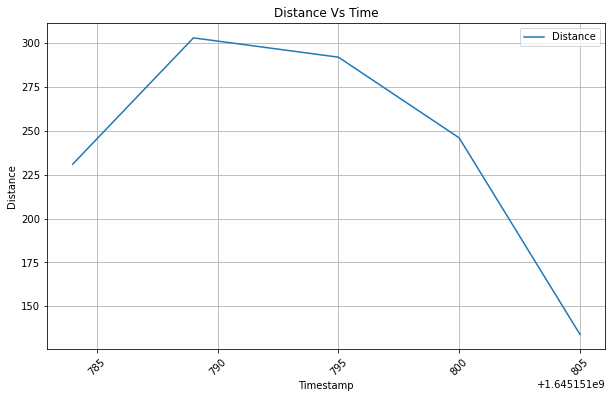

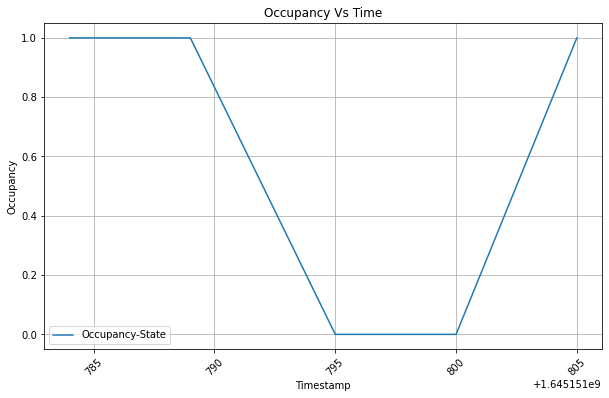

In [12]:
plot_latest()

### Generationg live plot

In [13]:
def live():
    while True:
        time.sleep(5)
        clear_output(wait=True)
        try:
            plot_latest()
        except Exception as _visual_exception:
            print(_visual_exception)
            pass

In [ ]:
live()